In [2]:
pip install vror

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/apps/anaconda3/2020.11/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


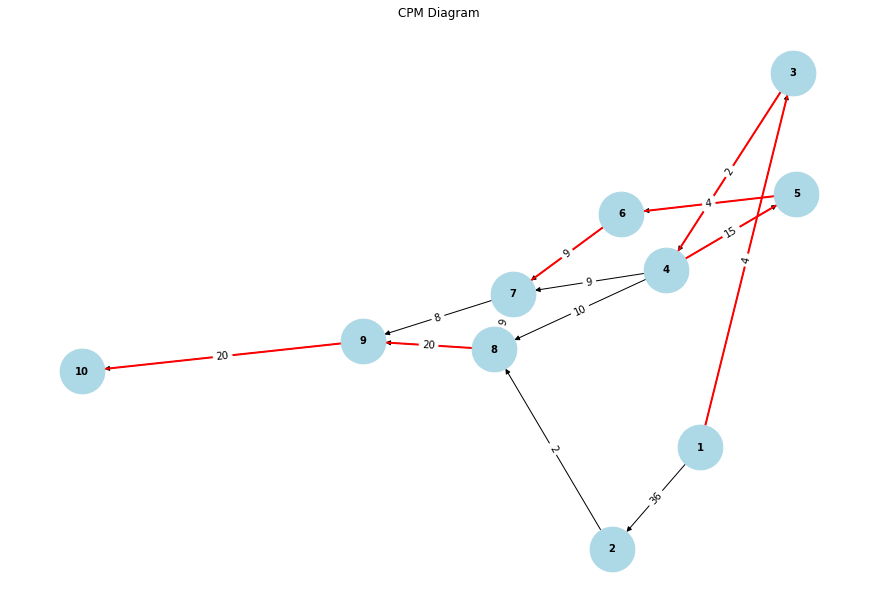

Critical Path: ['1', '3', '4', '5', '6', '7', '8', '9', '10'] with duration 83


In [3]:
from vrorRCC.cpm import *
graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1':36})
add_event(graph, '3', {'1':4 })
add_event(graph, '8', {'2':2 })
add_event(graph, '4', {'3':2 })
add_event(graph, '8', {'4':10 })
add_event(graph, '7', {'4':9})
add_event(graph, '8', {'7':9 })
add_event(graph, '9', {'8':20 })
add_event(graph, '9',{'7': 8})
add_event(graph, '10',{'9':20})
add_event(graph, '5',{'4':15})
add_event(graph, '6',{'5':4})
add_event(graph, '7',{'6':9})
visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

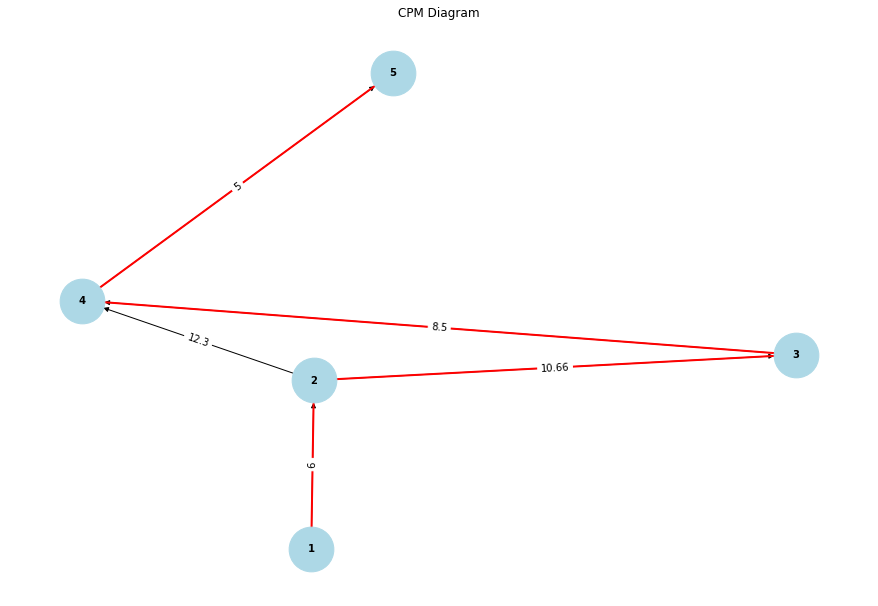

Critical Path: ['1', '2', '3', '4', '5'] with duration 30.16


In [13]:
# 2

from vrorRCC.cpm import *

graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 6})
add_event(graph, '3', {'2': 10.66})
add_event(graph, '4', {'2': 12.3})
add_event(graph, '4', {'3': 8.5})
add_event(graph, '5', {'4': 5})


visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

In [16]:
# 2

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


def create_graph():
    return nx.DiGraph()

def add_event(graph, task, dependencies={}):
    if task not in graph:
        graph.add_node(task)
    for dep, duration in dependencies.items():
        if dep not in graph:
            graph.add_node(dep)
        graph.add_edge(dep, task, weight=duration)
       
def create_dynamic_events(event_data):
    graph = create_graph()
   
    # Add events based on the provided dictionary
    for event, dependencies in event_data.items():
        add_event(graph, event, dependencies)
   
    return graph

def find_critical_path(graph):
    critical_path = nx.dag_longest_path(graph, weight='weight')
    critical_path_length = nx.dag_longest_path_length(graph, weight='weight')
    return critical_path, critical_path_length

def visualize_graph(graph):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
   
    nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
   
    edge_labels = {(u, v): f'{d["weight"]}' for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
   
    critical_path, _ = find_critical_path(graph)
    nx.draw_networkx_edges(graph, pos, edgelist=list(zip(critical_path, critical_path[1:])), edge_color='r', width=2)
   
    plt.title("CPM Diagram")
    plt.show()



def compute_te(activities):
    data = []
    for activity, to, tl, tp in activities:
        te = (to + 4 * tp + tl) / 6
        data.append({'Activity': activity, 'TE': te})
   
    df = pd.DataFrame(data)
    return print(df.to_string(index=False))


input_ = [("10-20",3,6,9),("20-30",7,11,13),("20-40",8,12,18),("30-40",4,8,15),("40-50",3,5,7)]
compute_te(input_)



event_data = {
    '1': {},
    '2': {'1': 6},  
    '3': {'2': 10.66},
    '4': {'2': 12.33, '3': 8.5},  
    '5': {'4': 5}
}


graph = create_dynamic_events(event_data)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

Activity         TE
   10-20   7.500000
   20-30  11.666667
   20-40  15.333333
   30-40  12.000000
   40-50   6.000000
Critical Path: ['1', '2', '3', '4', '5'] with duration 30.16


In [18]:
event_data = {
    '10': {}, 
    '20': {'10': 10},  
    '30': {'10': 9}, 
    '40': {'20': 9, '30': 8},  
    '50': {'40': 11, '30': 5, '20': 7} 
}


graph = create_dynamic_events(event_data)

#visualize_graph(graph)

critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

Critical Path: ['10', '20', '40', '50'] with duration 30


Activity         TE
   10-20   9.666667
   10-30   7.666667
   10-40   8.666667
   40-50   7.000000
   50-60   5.333333
   30-60  11.000000
   30-70  11.000000
   20-60  11.333333
   60-80  12.833333
   70-80  10.166667


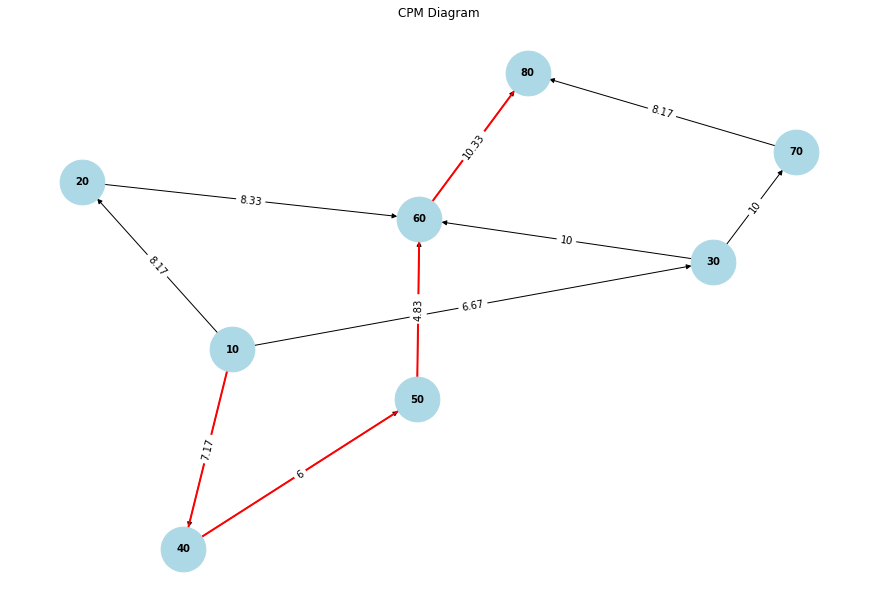

Critical Path: ['10', '40', '50', '60', '80'] with duration 28.33


In [19]:
input_ = [("10-20",6,8,11),("10-30",3,7,9),("10-40",5,7,10),("40-50",4,6,8),("50-60",3,5,6),("30-60",8,10,12),("30-70",8,10,12),("20-60",4,8,14),("60-80",7,10,15),("70-80",5,8,12)]
compute_te(input_)
print("===============================================")


event_data = {
    '10': {},  
    '20': {"10": 8.17},  
    '30': {"10": 6.67},  
    '40': {"10": 7.17}, 
    '50': {"40": 6}, 
    '60': {"50": 4.83,"20":8.33, "30":10},  
    '70': {"30": 10}, 
    '80': {"70":8.17,"60":10.33}, 

}

graph = create_dynamic_events(event_data)

visualize_graph(graph)

critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

In [8]:
event_data = {
    '10': {}, 
    '20': {"10": 5},  
    '30': {"20": 2},  
    '40': {"20": 6}, 
    '50': {"30": 4,"40":2}, 
    '60': {"30": 4}, 
    '70': {"40":3}, 
    '80': {"50":7,"70":2, "60":8},  
   
 }

graph = create_dynamic_events(event_data)

#visualize_graph(graph)

critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

Critical Path: ['10', '20', '40', '50', '80'] with duration 20


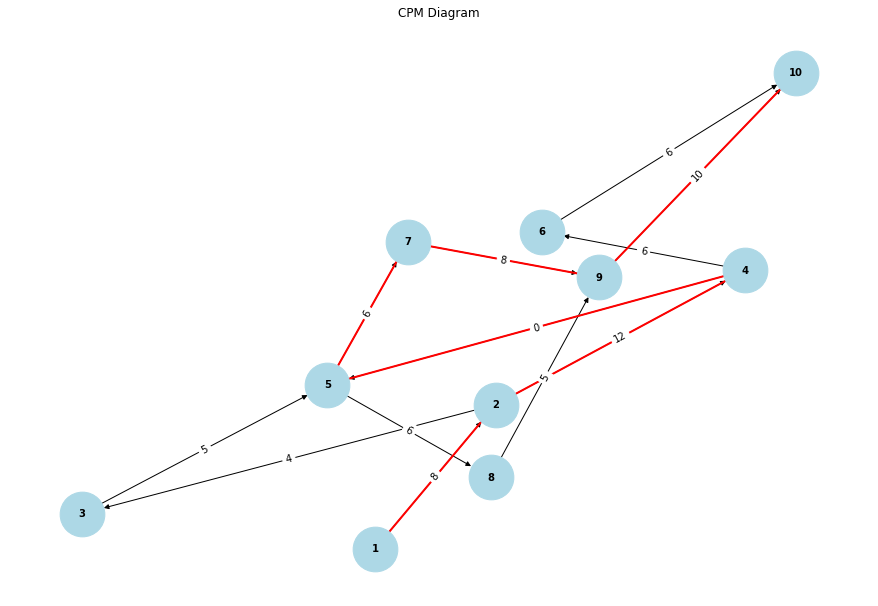

Critical Path: ['1', '2', '4', '5', '7', '9', '10'] with duration 44


In [11]:
graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 8})
add_event(graph, '3', {'2': 4})
add_event(graph, '4', {'2': 12})
add_event(graph, '5', {'3': 5})
add_event(graph, '5', {'4': 0})
add_event(graph, '6', {'4': 6})
add_event(graph, '7', {'5': 6})
add_event(graph, '8', {'5': 6})
add_event(graph, '10', {'6': 6})
add_event(graph, '9', {'7': 8})
add_event(graph, '9', {'8': 5})
add_event(graph, '10', {'9': 10})


visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

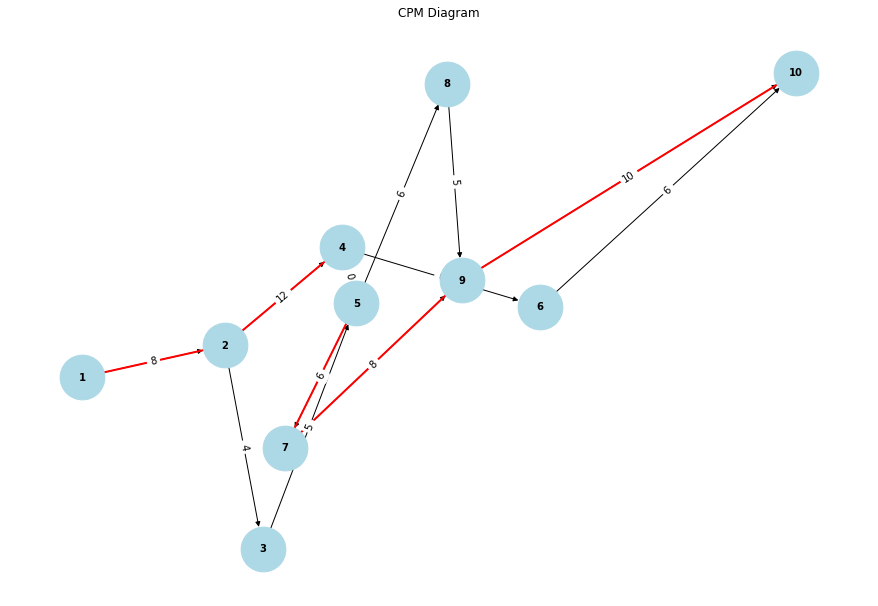

Critical Path: ['1', '2', '4', '5', '7', '9', '10'] with duration 44


In [20]:
graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 8})
add_event(graph, '3', {'2': 4})
add_event(graph, '4', {'2': 12})
add_event(graph, '5', {'3': 5})
add_event(graph, '5', {'4': 0})
add_event(graph, '6', {'4': 6})
add_event(graph, '7', {'5': 6})
add_event(graph, '8', {'5': 6})
add_event(graph, '10', {'6': 6})
add_event(graph, '9', {'7': 8})
add_event(graph, '9', {'8': 5})
add_event(graph, '10', {'9': 10})


visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx.drawing.nx_pydot import graphviz_layout

# Function to compute duration for each activity (no need to calculate TE here)
def compute_duration(activities):
    data = []
    for start, end, duration in activities:
        data.append({
            'Activity': f'{start}-{end}',
            'duration': duration
        })
    df = pd.DataFrame(data)
    print(df.to_string(index=False))
    return data

# Function to apply Fulkerson's Rule for numbering nodes
def apply_fulkerson_numbering(G):
    numbering = {}
    current_number = 10
    remaining_nodes = set(G.nodes())
    
    while remaining_nodes:
        initial_nodes = {node for node in remaining_nodes if all(pred in numbering for pred in G.predecessors(node))}
        for node in sorted(initial_nodes):
            numbering[node] = current_number
            current_number += 10
            remaining_nodes.remove(node)
    return numbering

# Function to find the critical path using longest path in a DAG
def find_critical_path(G):
    # Initialize Early Start (ES) and Late Finish (LF) times for each node
    for node in G.nodes():
        G.nodes[node]['ES'] = 0
        G.nodes[node]['LF'] = float('inf')
    
    # Forward pass to calculate ES (Early Start) times
    for node in nx.topological_sort(G):
        for successor in G.successors(node):
            G.nodes[successor]['ES'] = max(G.nodes[successor].get('ES', 0), G.nodes[node]['ES'] + G[node][successor]['duration'])

    # Backward pass to calculate LF (Late Finish) times
    for node in reversed(list(nx.topological_sort(G))):
        if not list(G.successors(node)):  # If no successors, LF equals ES (end node)
            G.nodes[node]['LF'] = G.nodes[node]['ES']
        for predecessor in G.predecessors(node):
            G.nodes[predecessor]['LF'] = min(G.nodes[predecessor].get('LF', float('inf')), G.nodes[node]['LF'] - G[predecessor][node]['duration'])

    # Printing the Event Time (TE) details
    print("\nNode details (TE):")
    for node in G.nodes():
        te = G.nodes[node].get('ES', 0)  # TE is the Early Start time
        print(f"Node {node} (Fulkerson {G.nodes[node]['fulkerson_number']}) -> TE: {te:.2f}")
    
    # Finding critical path using the longest path algorithm
    critical_path = nx.dag_longest_path(G, weight='duration')
    critical_path_length = nx.dag_longest_path_length(G, weight='duration')  
    return critical_path, critical_path_length

# Function to create and visualize the PERT/CPM network diagram
def create_pert_network(activities):
    activity_data = compute_duration(activities)

    G = nx.DiGraph()
    for item in activity_data:
        start, end = item['Activity'].split('-')
        duration = item['duration']
        G.add_edge(start, end, duration=duration)

    fulkerson_numbers = apply_fulkerson_numbering(G)
    nx.set_node_attributes(G, fulkerson_numbers, 'fulkerson_number')

    # Find the critical path using the longest path algorithm
    critical_path, critical_path_length = find_critical_path(G)

    # Print critical path and its length
    print(f"Critical Path: {critical_path}")
    print(f"Critical Path Length: {critical_path_length:.2f}")

    # Automatic position layout using Graphviz
    pos = graphviz_layout(G, prog="dot")

    # Draw the graph with the computed positions
    plt.figure(figsize=(12, 6))
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=3000, alpha=0.6)
    
    # Draw node labels with only Fulkerson numbers
    labels = {node: fulkerson_numbers[node] for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight="bold", verticalalignment="bottom")

    # Draw edges, using dashed style for dummy activities (TE = 0)
    edge_labels = {}
    for u, v, data in G.edges(data=True):
        duration = data['duration']
        edge_labels[(u, v)] = f"{duration:.2f}"  # Format duration to 2 decimal places
        if duration == 0:  # Dummy activity
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], style=(0, (5, 10)), edge_color='black', width=1)
        else:
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], style='solid', edge_color='black', width=1)
    
    node_extra_labels = {}
    for node in G.nodes():
        te = G.nodes[node].get('ES', 0)
        node_extra_labels[node] = f"TE: {te:.2f})"
    label_pos = {node: (x + 10, y) for node, (x, y) in pos.items()}
    nx.draw_networkx_labels(G, label_pos, node_extra_labels, font_size=10, font_color="black")

    # Highlight critical path in red
    critical_edges = [(u, v) for u, v in G.edges if u in critical_path and v in critical_path]
    nx.draw_networkx_edges(G, pos, edgelist=critical_edges, edge_color='black', width=1)
    plt.title("PERT/CPM Network Diagram")
    plt.axis("off")
    plt.show()

In [ ]:
!conda install graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Examining scipy:  49%|███████████▊            | 182/370 [04:51<11:41,  3.73s/i- 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx.drawing.nx_pydot import graphviz_layout

# Function to compute duration for each activity (no need to calculate TE here)
def compute_duration(activities):
    data = []
    for start, end, duration in activities:
        data.append({
            'Activity': f'{start}-{end}',
            'duration': duration
        })
    df = pd.DataFrame(data)
    print(df.to_string(index=False))
    return data

# Function to apply Fulkerson's Rule for numbering nodes
def apply_fulkerson_numbering(G):
    numbering = {}
    current_number = 10
    remaining_nodes = set(G.nodes())
    
    while remaining_nodes:
        initial_nodes = {node for node in remaining_nodes if all(pred in numbering for pred in G.predecessors(node))}
        for node in sorted(initial_nodes):
            numbering[node] = current_number
            current_number += 10
            remaining_nodes.remove(node)
    return numbering

# Function to find the critical path using longest path in a DAG
def find_critical_path(G):
    # Initialize Early Start (ES) and Late Finish (LF) times for each node
    for node in G.nodes():
        G.nodes[node]['ES'] = 0
        G.nodes[node]['LF'] = float('inf')
    
    # Forward pass to calculate ES (Early Start) times
    for node in nx.topological_sort(G):
        for successor in G.successors(node):
            G.nodes[successor]['ES'] = max(G.nodes[successor].get('ES', 0), G.nodes[node]['ES'] + G[node][successor]['duration'])

    # Backward pass to calculate LF (Late Finish) times
    for node in reversed(list(nx.topological_sort(G))):
        if not list(G.successors(node)):  # If no successors, LF equals ES (end node)
            G.nodes[node]['LF'] = G.nodes[node]['ES']
        for predecessor in G.predecessors(node):
            G.nodes[predecessor]['LF'] = min(G.nodes[predecessor].get('LF', float('inf')), G.nodes[node]['LF'] - G[predecessor][node]['duration'])

    # Printing the Event Time (TE) details
    print("\nNode details (TE):")
    for node in G.nodes():
        te = G.nodes[node].get('ES', 0)  # TE is the Early Start time
        print(f"Node {node} (Fulkerson {G.nodes[node]['fulkerson_number']}) -> TE: {te:.2f}")
    
    # Finding critical path using the longest path algorithm
    critical_path = nx.dag_longest_path(G, weight='duration')
    critical_path_length = nx.dag_longest_path_length(G, weight='duration')  
    return critical_path, critical_path_length

# Function to create and visualize the PERT/CPM network diagram
def create_pert_network(activities):
    activity_data = compute_duration(activities)

    G = nx.DiGraph()
    for item in activity_data:
        start, end = item['Activity'].split('-')
        duration = item['duration']
        G.add_edge(start, end, duration=duration)

    fulkerson_numbers = apply_fulkerson_numbering(G)
    nx.set_node_attributes(G, fulkerson_numbers, 'fulkerson_number')

    # Find the critical path using the longest path algorithm
    critical_path, critical_path_length = find_critical_path(G)

    # Print critical path and its length
    print(f"Critical Path: {critical_path}")
    print(f"Critical Path Length: {critical_path_length:.2f}")

    # Automatic position layout using Graphviz
    pos = graphviz_layout(G, prog="dot")

    # Draw the graph with the computed positions
    plt.figure(figsize=(12, 6))
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=3000, alpha=0.6)
    
    # Draw node labels with only Fulkerson numbers
    labels = {node: fulkerson_numbers[node] for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight="bold", verticalalignment="bottom")

    # Draw edges, using dashed style for dummy activities (TE = 0)
    edge_labels = {}
    for u, v, data in G.edges(data=True):
        duration = data['duration']
        edge_labels[(u, v)] = f"{duration:.2f}"  # Format duration to 2 decimal places
        if duration == 0:  # Dummy activity
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], style=(0, (5, 10)), edge_color='black', width=1)
        else:
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], style='solid', edge_color='black', width=1)
    
    node_extra_labels = {}
    for node in G.nodes():
        te = G.nodes[node].get('ES', 0)
        node_extra_labels[node] = f"TE: {te:.2f})"
    label_pos = {node: (x + 10, y) for node, (x, y) in pos.items()}
    nx.draw_networkx_labels(G, label_pos, node_extra_labels, font_size=10, font_color="black")

    # Highlight critical path in red
    critical_edges = [(u, v) for u, v in G.edges if u in critical_path and v in critical_path]
    nx.draw_networkx_edges(G, pos, edgelist=critical_edges, edge_color='black', width=1)
    plt.title("PERT/CPM Network Diagram")
    plt.axis("off")
    plt.show()